# Business Case 2

Group members:
- Lorenzo Pigozzi	--- m20200745
- Nguyen Huy Phuc	--- m20200566
- Ema Mandura	  --- m20200647


## Hotel Chain C

**Overview**\
The objective of the project is to provide an algorithm able to predict if a customer will cancell his booking. 
For further informations about the business context or dataset provided, check the context folder available on GitHub.

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Importing data and libraries](#1)   
2.	[Exploratory data analysis (EDA)](#2)       
3.	[Data preprocessing](#3)  
4.  [Cluster analysis](#4)      
5.  [Merging the results](#5)

# 1. Importing data and libraries <a class="anchor" id="1"></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('data/H2.csv')

# 2. Exploratory data analysis (EDA) <a class="anchor" id="2"></a>

In [36]:
def countplot_all(df, columns):
    #Prepare figure layout
    rows = int(math.ceil(columns.shape[0]/5))
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows = rows, ncols=5, figsize=(15,3*rows))

    # Draw the boxplots
    for i in zip(axes.flatten(), columns):
        sns.countplot(x=df.loc[:,i[1]], ax=i[0])      
        i[0].set_title(i[1])
        i[0].set_ylabel("")
        i[0].set_xlabel("")
        for tick in i[0].get_xticklabels():
            tick.set_rotation(-25)
    # Finalize the plot
    plt.subplots_adjust(wspace=0.5,hspace = 0.5)
    fig.suptitle("Count plots", fontsize=25)
    #sns.despine(bottom=True)
    plt.show()


def corrheatmap(dataframe, method = "pearson"):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = dataframe.corr(method= method) #Getting correlation of numerical variables

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
    mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(20, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle("Correlation matrix", fontsize=15)
    plt.yticks(rotation=0, fontsize = 14)
    plt.xticks(rotation=-45, fontsize = 14)
    # Fixing the bug of partially cut-off bottom and top cells
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

    plt.show()        

    
def boxplot_withoutLabels(df):
    plot_features = df.columns
    #Prepare figure layout
    rows = int(math.ceil(df.shape[1]/8))
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(nrows = rows, ncols=8, figsize=(16,4*rows))

    # Draw the boxplots
    for i in zip(axes.flatten(), plot_features):
        sns.boxplot(y=df.loc[:,i[1]], ax=i[0])      
        i[0].set_title(i[1])
        i[0].set_ylabel("")
        for tick in i[0].get_xticklabels():
            tick.set_rotation(-25)

    # Finalize the plot
    plt.subplots_adjust(wspace=2,hspace = 0.5)
    fig.suptitle("Box plots", fontsize=25)
    #sns.despine(bottom=True)
    plt.show()

In [24]:
df.iloc[:,25:]

,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Transient,0.00,0,0,Check-Out,2015-07-03
1,Transient,76.50,0,1,Canceled,2015-07-01
2,Transient,68.00,0,1,Canceled,2015-04-30
3,Transient,76.50,0,2,Canceled,2015-06-23
4,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...
79325,Transient,96.14,0,0,Check-Out,2017-09-06
79326,Transient,225.43,0,2,Check-Out,2017-09-07
79327,Transient,157.71,0,4,Check-Out,2017-09-07
79328,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
# defining metric, non_metric and categorical features

metric_feats = ['LeadTime', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'PreviousCancellations','PreviousBookingsNotCanceled',
       'BookingChanges','DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests']

non_metric_feats = df.columns[~df.columns.isin(metric_feats)]

cat_feats = ['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth', 'Meal',
       'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest',
       'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType', 'ReservationStatus']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [6]:
# missing values check
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [35]:
# Checking duplicated observations
df.loc[df.duplicated(keep=False), :]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
10,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
12,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79312,0,175,2017,August,35,31,1,3,1,0.0,...,No Deposit,42,NULL,0,Transient,82.35,0,1,Check-Out,2017-09-04


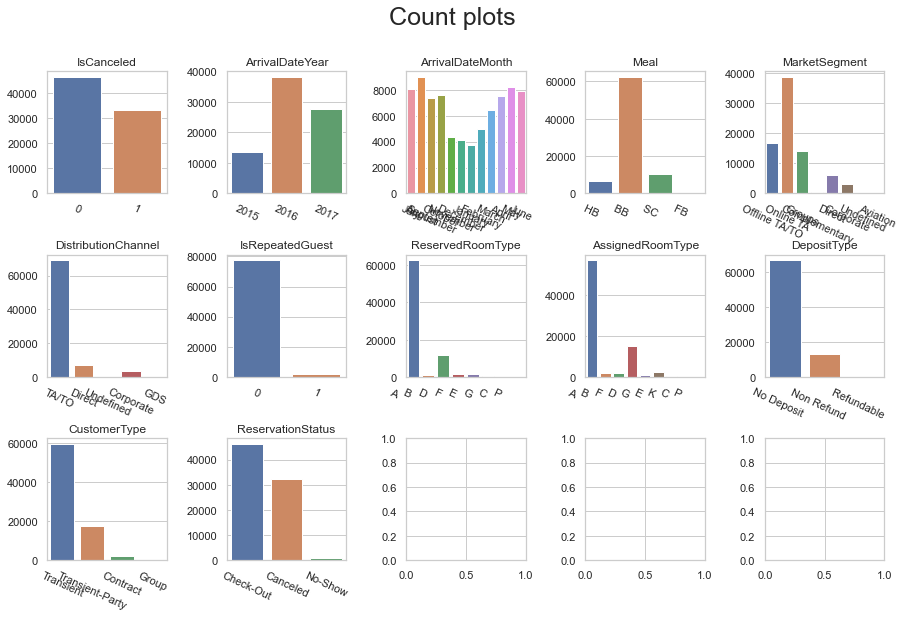

In [34]:
# checking the distribution of the categorical features
countplot_all(df,np.array(cat_feats))

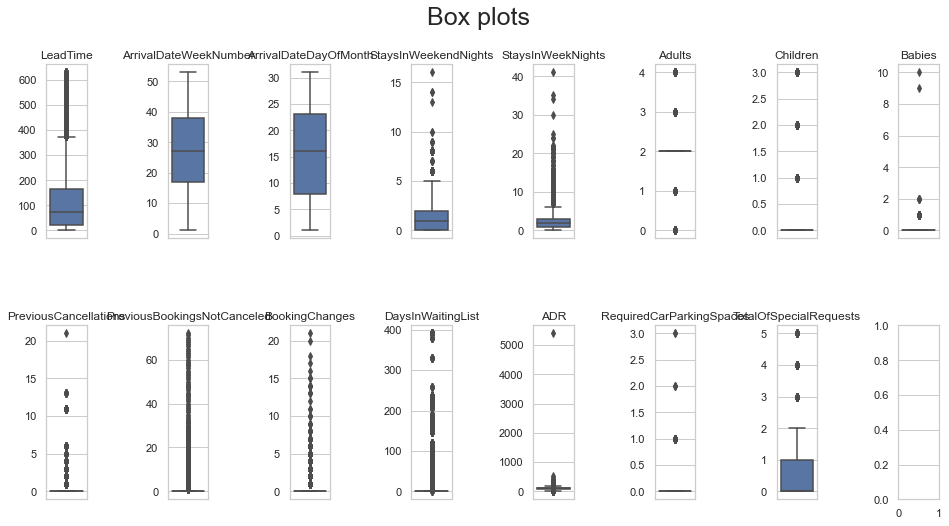

In [38]:
# checking the distributions of the metric features
boxplot_withoutLabels(df[metric_feats])

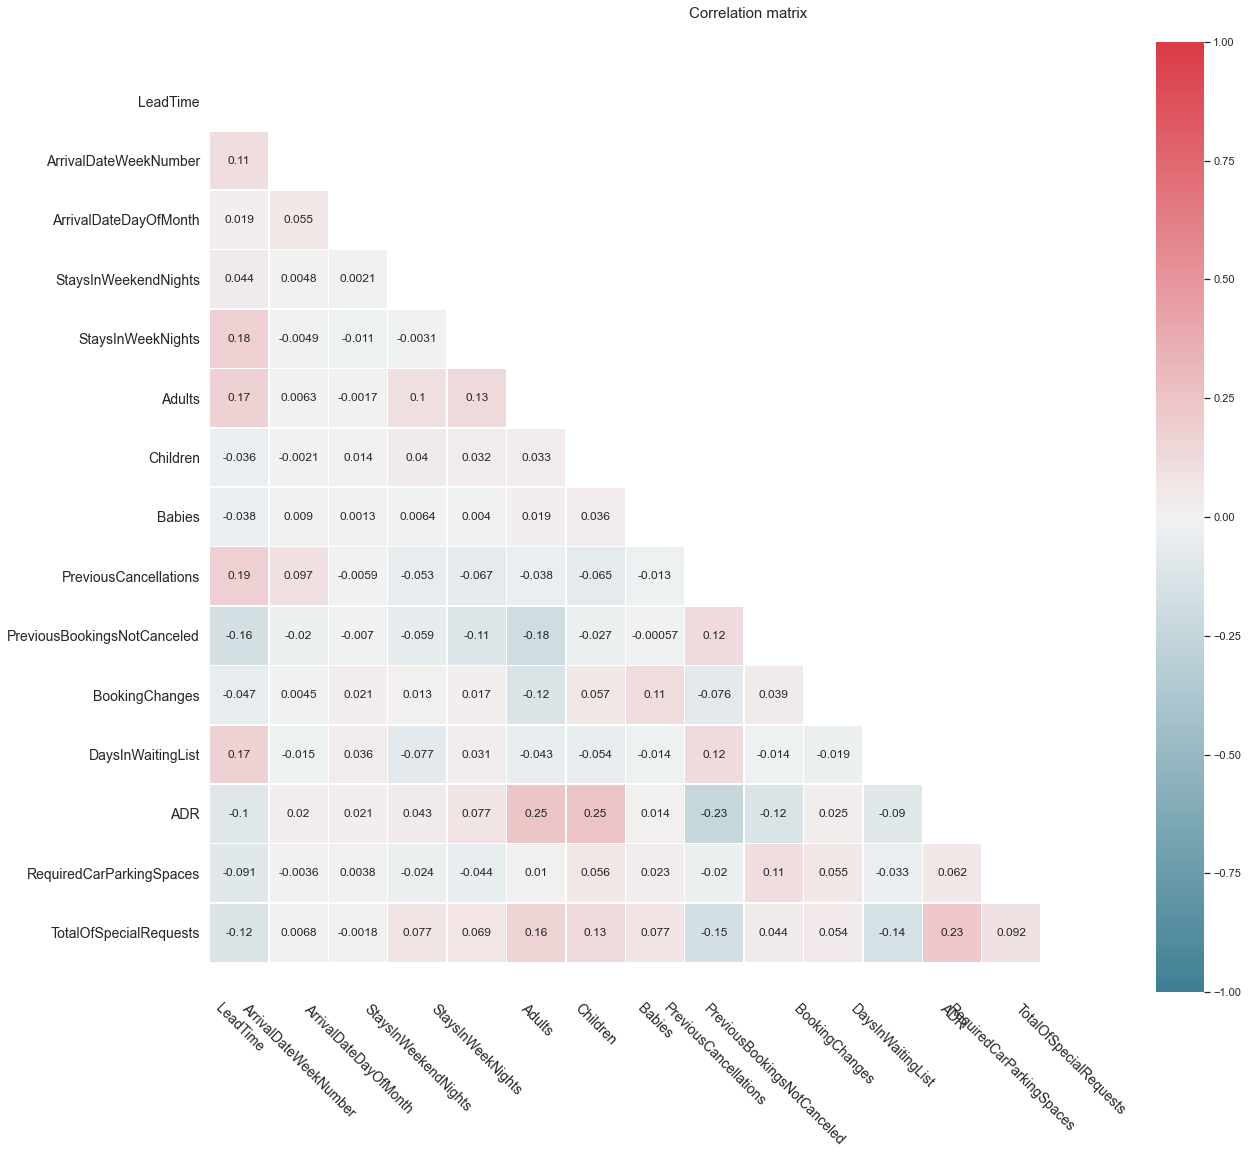

In [39]:
# checking the correlations among the numerical features
corrheatmap(df[metric_feats], method = 'spearman')

**Notes:**
- Iscancelled is the target variable
- ReservationStatus : be careful, possible alternative target variable
- there are only a few NaNs in the variables Children and Country
- there are many duplicated rows in the data. Further analysis is needed
- arrivaldatemonth is not useful due to the ArrivalDateWeekNumber
- no relevant correlations detected among the metric features
- data may contain outliers probably

# 3. Data preprocessing <a class="anchor" id="3"></a>